IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

KABONGO BUZANGU Ben

Ce projet peut être fait (c'est même recommandé) en binôme. Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - mars 2022


<font size="+1" color="RED"><b>Date de rendu : vendredi 25 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur:
- les données Bases_IADS : cela correspond à un problème de classification binaire
- les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclasses

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivantes:

          -- ce_notebook.ipynb
          -- Bases_IADS/ 
              -- README.txt
              -- train.csv
              -- test.csv
              -- eval.csv
              -- names.csv
          -- Bases_IADS_multiclasses/
              -- README.txt
              -- train_multi.csv
              -- test_multi.csv
              -- eval_multi.csv
              -- names_multi.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.


Les fichiers de chaque répertoire correspondent à:
- fichier README.txt : donne des explications sur le contenu du répertoire
- fichier train*.csv : base d'apprentissage à utiliser pour construire le classfieur
- fichier test*.csv : base de test pour évaluer vous même le classifieur construit. Les exemples de ce fichier NE DOIVENT PAS être utilisés pour l'apprentissage du classifieur.
- fichier eval*.csv : fichier d'évaluation du classifieur (voir ci-dessous).

## Travail à faire

Pour chaque ensemble de données:
- les 2 algorithmes d'apprentissage knn et perceptron doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations pourront être : comparaison des taux de bonne classification apprentissage / test (avec validation croisée), visualisation, etc.
- de plus, un fichier `eval.csv` est fourni. Ce fichier contient des descriptions associées à un "faux" label. Dans votre compte-rendu, vous devez fournir un fichier CSV qui donne, pour chaque exemple du fichier `eval.csv`la classe trouvée par votre meilleur classifieur. Ainsi, le fichier CSV à rendre doit comporter 2 colonnes et autant de lignes que d'exemples (une ligne par exemple du fichier eval):<br>
            IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
            ...
Le résultat de classification vous sera donné en retour (nous connaissons la vraie classe des exemples de ce fichier...).

Vos **expérimentations doivent être expliquées** (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.


Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.



## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement)
- ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !
- un fichier CSV dont le nom est de la forme: *projet-1-Nom1_Nom2.csv* (sur le modèle du nom du notebook) qui donne la classe de chaque exemple du fichier `eval.csv` trouvée par votre classifieur.


**Remarque**: en considérant que les algorithmes knn et perceptron ont été réalisés lors des séances de TME 1 à 6, le travail demandé pour ce projet correspond à, au plus, une séance complète de TME.

In [1]:
import copy
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

%matplotlib inline

plt.style.use('seaborn-whitegrid')

# Prise en main des données et utilitaires


## Chargement des données

Commençons par charger nos données.
On dispose de deux bases de données : une première sur des données bi-classes et une seconde sur des données multi-classes.

### Données bi-classes

#### Noms des colonnes

Chargeons les noms des colonnes pour les données bi-classes.

In [2]:
names_df = pd.read_csv('Bases_IADS/names.csv', sep=';')

In [3]:
names_df.columns

Index(['ident', 'A001', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008',
       'A009',
       ...
       'A776', 'A777', 'A778', 'A779', 'A780', 'A781', 'A782', 'A783', 'A784',
       'label'],
      dtype='object', length=786)

Il y a **786** colonnes dont :
- La colonne `ident`: l'identifiant de nos exemples
- Les (**784**) colonnes préfixées par `A..`: propriétés des exemples 
- La colonne `label`: classe des exemples

#### Données d'apprentissage bi-classes

In [4]:
train_df = pd.read_csv('Bases_IADS/train.csv', sep=';', header=None)

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


Récupérons séparément les propriétés de nos données et leurs labels.

In [6]:
train_arr = np.array(train_df)
print(train_arr.shape)

(1000, 786)


Propriétés des données :

In [7]:
X_train = train_arr[:,1:-1]
print(X_train.shape)
print(np.all(X_train == 0))

(1000, 784)
False


Labels des données :

In [8]:
Y_train = train_arr[:,-1]
print(Y_train.shape)
print(np.unique(Y_train))

(1000,)
[-1  1]


A quoi ressembent nos données ?
Serait-ce des images ?

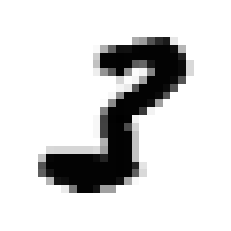

In [9]:
plt.imshow(X_train[np.random.randint(1000)].reshape(28, 28))
plt.axis('off')
plt.show()

Les données que nous classons sont des images de chiffres.

#### Données de test bi-classes

In [10]:
test_df = pd.read_csv('Bases_IADS/test.csv', sep=';', header=None)

In [11]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,20001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,20002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,20003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,20004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,20005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [12]:
test_arr = np.array(test_df)
print(test_arr.shape)

(1000, 786)


Propriétés des données :

In [13]:
X_test = test_arr[:,1:-1]
print(X_test.shape)
print(np.all(X_test == 0))

(1000, 784)
False


Labels des données :

In [14]:
Y_test = test_arr[:,-1]
print(Y_test.shape)
print(np.unique(Y_test))

(1000,)
[-1  1]


#### Données d'évaluation bi-classes

In [15]:
eval_df = pd.read_csv('Bases_IADS/eval.csv', sep=';', header=None)

In [16]:
eval_df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Récupérons les propriétés des données à évaluer.

Une fois nos classifieurs implémentés, nous en prédirons les labels.

In [17]:
eval_arr = np.array(eval_df)
print(eval_arr.shape)

(1000, 786)


In [18]:
X_eval = eval_arr[:,1:-1]
print(X_eval.shape)
print(np.all(X_eval == 0))

(1000, 784)
False


### Données multi-classes

#### Noms des colonnes

In [19]:
names_multi_df = pd.read_csv('Bases_IADS_multiclasses/names_multi.csv', sep=';')

In [20]:
names_multi_df.columns

Index(['ident', 'A001', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008',
       'A009',
       ...
       'A776', 'A777', 'A778', 'A779', 'A780', 'A781', 'A782', 'A783', 'A784',
       'label'],
      dtype='object', length=786)

Le nommage des colonnes est le même que pour les données binaires.

#### Données d'apprentissage multi-classes

In [21]:
train_multi_df = pd.read_csv('Bases_IADS_multiclasses/train_multi.csv', sep=';', header=None)

In [22]:
train_multi_df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_multi_arr = np.array(train_multi_df)
print(train_multi_df.shape)

(2000, 786)


In [24]:
X_train_multi = train_multi_arr[:,1:-1]
print(X_train_multi.shape)

(2000, 784)


In [25]:
Y_train_multi = train_multi_arr[:,-1]
print(Y_train_multi.shape)
print(np.unique(Y_train_multi))

(2000,)
[0 1 2 3 4 5 6 7 8 9]


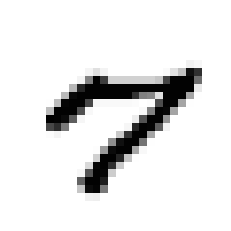

In [26]:
plt.imshow(X_train_multi[np.random.randint(2000)].reshape((28, 28)))
plt.axis('off')
plt.show()

#### Données de test multi-classes

In [27]:
test_multi_df = pd.read_csv('Bases_IADS_multiclasses/test_multi.csv', sep=';', header=None)

In [28]:
test_multi_df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,20001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_multi_arr = np.array(test_multi_df)
print(test_multi_arr.shape)

(2000, 786)


In [30]:
X_test_multi = test_multi_arr[:,1:-1]
print(X_test_multi.shape)

(2000, 784)


In [31]:
Y_test_multi = test_multi_arr[:,-1]
print(Y_test_multi.shape)
print(np.unique(Y_test_multi))

(2000,)
[0 1 2 3 4 5 6 7 8 9]


#### Données d'évaluation multi-classes

In [32]:
eval_multi_df = pd.read_csv('Bases_IADS_multiclasses/eval_multi.csv', sep=';', header=None)

In [33]:
eval_multi_df.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,90002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,90005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [34]:
eval_multi_arr = np.array(eval_multi_df)
print(eval_multi_arr.shape)

(2000, 786)


In [35]:
X_eval_multi = eval_multi_arr[:,1:-1]
print(X_eval_multi.shape)

(2000, 784)


## Validation croisée

Afin de tester les performances de nos classifieurs, nous utiliserons entre outre la validation croisée.

Commençons par écrire la fonction `crossval` qui divise une partie du jeu de données en blocs. En particulier, tous les exemples du jeu de données fourni à cette fonction sont de la même classe. En effet, nous souhaitons obtenir des blocs qui tiennent compte de la distribution des classes de notre jeu de données initial. Cette fonction se charge donc de constituer un bloc de taille correspondant à la proportion d'une classe donnée dans le jeu de données initial ; lequel sera, dans la prochaine fonction, fusionné aux blocs des autres classes. 

Elle prend en paramètres :
- `X`: un jeu de données de la même classe `y`
- `y`: la classe de notre jeu de données
- `n`: le nombre de blocs à constituer
- `i`: le numéro du bloc

Elle retourne :
- `Xtrain`: le bloc d'apprentissage
- `Xtest`: le bloc de test

La classe associée est évidemment toujours la classe `y`.

In [36]:
def crossval(X, y, n, i):
    a = len(X)
    s, e = i * int(a/n), (i+1) * int(a/n)
    X_train = np.delete(X, np.s_[s:e], axis=0)
    X_test = X[s:e]
    return X_train, X_test

Ecrivons à présent la fonction `crossvalmulti` qui segmente notre jeu de données en blocs, en tenant compte de la distribution des classes. La fonction se veut générique ; elle gère donc le cas binaire et multi-classes.

`Y` représente ici les labels associés aux exemples. La fonction retourne un bloc de données d'apprentissage et un bloc de données de test et leurs labels respectifs.

In [37]:
def crossvalmulti(X, Y, n, i):
    X_train, Y_train, X_test, Y_test = [], [], [], []
    
    for y in np.unique(Y):
        X_train_i, X_test_i = crossval(X[Y==y], y, n, i)
        X_train.append(X_train_i)
        Y_train.append(y * np.ones(len(X_train_i), dtype=int))
        X_test.append(X_test_i)
        Y_test.append(y * np.ones(len(X_test_i), dtype=int))
    
    X_train = np.concatenate(X_train)
    Y_train = np.concatenate(Y_train)
    X_test = np.concatenate(X_test)
    Y_test = np.concatenate(Y_test)
    
    return X_train, Y_train, X_test, Y_test

## Visualisation des données

Utilisons la notion de vecteurs et de valeurs propres afin de visualiser les données que nous traitons dans un espace à deux dimensions.

Ecrivons la fonction `visualize` qui prend en paramètres un jeu de données et leurs labels associés, et qui affiche la projection de ces données en 2D

In [38]:
def visualize(X, Y):
    W, V = np.linalg.eig(X.T @ X)
    i, j = np.argsort(W)[-2:]
    Xj = np.dot(X, V.T[j])
    Xi = np.dot(X, V.T[i])
    n = len(np.unique(Y))
    for y in range(n):
        plt.scatter(Xj[Y==y], Xi[Y==y])
    plt.legend(np.arange(n))

Visualisons nos données multi-classes.

/home/benkabongo25/.local/lib/python3.7/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


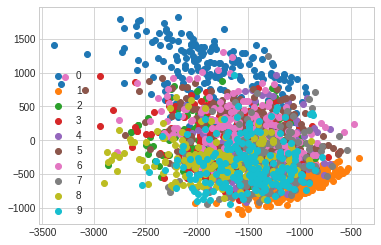

In [39]:
visualize(X_train_multi, Y_train_multi)

# Classifieurs

Pour ce projet, nous allons implémenter les classifieurs suivants :

- `KNN plus proches voisins`
- `Perceptron`

Nos classifieurs seront adaptés pour faire de la classification binaire et la classification multi-classes.

Nous allons implémenter une classe de base des classifieurs, que nous appelerons `Classifier`. Les classes `KNNClassifier` et `PerceptronClassifier` seront des classes héritières de cette classe et implémenterons respectivement les algorithmes des KNN et du perceptron.

Nous allons également implémenter la classe `MultiClassifier` afin de gérer de façon générique la classification multi-classe.

Nos classifieurs seront pourvus de plusieurs métriques d'évaluations.

## Mesure des performances des classifieurs

Différentes mesures peuvent informer sur les performances d'un classifieur (notamment binaire).
Nous avons pris en compte quelques uns.

### Vrais positifs, vrais négatifs, faux positifs, faux négatifs

Soit la classe $C_{i}$.

#### Vrais positifs

Les vrais positifs $VP_{i}$ représentent la quantité d'exemples de la classe $C_{i}$ dont la classe prédite est $C_{i}$. 

#### Vrais négatifs

Les vrais négatifs $VN_{i}$ représentent la quantité d'exemples qui ne sont pas de la classe $C_{i}$ dont la classe prédite est également différente de $C_{i}$. 

#### Faux positifs

Les faux positifs $FP_{i}$ représentent la quantité d'exemples qui ne sont pas de la classe $C_{i}$ dont la classe prédite est $C_{i}$. 

#### Faux négatifs

Les faux négatifs $FN_{i}$ représentent la quantité d'exemples de la classe $C_{i}$ dont la classe prédite est différente de $C_{i}$.

### Précision et rappel

#### Précision

Le rapport entre le nombre d'exemples correctement classés dans la classe $C_{i}$ et le nombre de tous les exemples classés dans cette classe.

$Précision (C_{i}) = \frac{VP_{i}}{VP_{i} + FP_{i}}$

#### Rappel

Le rapport entre le nombre d'exemples correctement classés dans la classe $C_{i}$ et le nombre de tous les exemples de cette classe.

$Rappel (C_{i}) = \frac{VP_{i}}{VP_{i} + FN_{i}}$

### Taux de succès et taux d'erreur

#### Taux de succès

La proportion d'exemples correctement classés.

$Acc (C_{i}) = \frac{VP + VN}{VP + VN + VP + FN}$

#### Taux d'erreur

La proportion d'exemples mal classés.

$Err (C_{i}) = \frac{FP + FN}{VP + VN + VP + FN} = 1 - Acc (C_{i})$

## Implémentation

### Classe de base

Partons d'une classe de base pour nos classifieurs, que nous appelerons `Classifier`.

In [40]:
class Classifier:
    '''
    classe de base des classifieurs
    '''

    def __init__(self, in_dim: int):
        '''
        :param in_dim: dimension des données
        '''
        assert in_dim > 0, 'La dimension des données ne peut être nulle'
        self.in_dim = in_dim
        self.conv_time = 0
        
    def accuracy(self, X: np.ndarray, Y: np.ndarray) -> float:
        '''
        :param X: données
        :param Y: labels
        :return le taux de bonne classification
        '''
        return np.sum(self.predict_all(X) == Y) / len(Y)
        
    def evaluate(self, X: np.ndarray, Y: np.ndarray) -> dict:
        '''
        évalue le classifieur
        :param X: données
        :param Y: labels
        :return informations sur les performances du classifieur
        '''
        raise NotImplementedError
    
    def get_conv_time(self):
        '''
        :return le temps de convergence après apprentissage
        '''
        return self.conv_time

    def predict(self, x: np.ndarray) -> int:
        '''
        prédiction de la classe d'un exemple
        :param x: exemple
        :return la classe de x
        '''
        raise NotImplementedError

    def predict_all(self, X: np.ndarray) -> np.ndarray:
        '''
        prédiction des classes d'un data set
        :param X: data set
        :return classes des exemples
        '''
        return np.array([self.predict(x) for x in X])

    def score(self, x: np.ndarray) -> float:
        '''
        calcul du score d'un exemple
        :return le score de x
        '''
        raise NotImplementedError
        
    def _train(self, X: np.ndarray, Y: np.ndarray):
        '''
        apprentissage du modèle
        :param X: données
        :param Y: labels
        '''
        raise NotImplementedError
    
    def train(self, X: np.ndarray, Y: np.ndarray, **args):
        '''
        apprentissage et calcul du temps de convergence
        :see _train()
        '''
        t = time.time()
        self._train(X, Y, **args)
        self.conv_time = time.time() - t

**Point sur les boucles for**

Les boucles `for` de Python ralentissent l'exécution du code. Afin de palier à ce problème, on les évitera le plus possible.

Nous allons donc créer deux versions du classifieur de base : `Classifier2` et `Classifier10`. Les classifieurs binaires hériteront de `Classifier2` et les classifieurs multi-classes hériteront de `Classifier10`.

Les deux classes redéfinissent la méthode `evaluate` ; laquelle donne plus d'informations sur les performances du classifieur.

### Classifieur binaire de base

In [41]:
class Classifier2(Classifier):
    
    def evaluate(self, X, Y):
        n = len(Y)
        Y_ = self.predict_all(X)
        acc = np.sum(Y_ == Y) / n
        err = 1 - acc

        d = {'Acc':acc, 'Err':err}
        
        # -1
        w = np.where(Y_ == -1)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != -1)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({'(-1) Précision':precision, '(-1) Rappel':rappel})
        
        # +1
        w = np.where(Y_ == +1)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != +1)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({'(+1) Précision':precision, '(+1) Rappel':rappel})
        
        return d

### Classifieur décimal de base

In [42]:
class Classifier10(Classifier):
    
    def evaluate(self, X, Y):
        n = len(Y)
        Y_ = self.predict_all(X)
        acc = np.sum(Y_ == Y) / n
        err = 1 - acc

        d = {'Acc':acc, 'Err':err}
        
        # 0
        i = 0
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 1
        i = 1
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 2
        i = 2
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 3
        i = 3
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 4
        i = 4
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 5
        i = 5
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 6
        i = 6
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 7
        i = 7
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 8
        i = 8
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        # 9
        i = 9
        w = np.where(Y_ == i)[0]
        vp = np.sum(Y_[w] == Y[w])
        fp = np.sum(Y_[w] != Y[w])
        w = np.where(Y_ != i)[0]
        vn = np.sum(Y_[w] == Y[w])
        fn = np.sum(Y_[w] != Y[w])
        precision = vp / (vp + fp)
        rappel = vp / (vp + fn)
        d.update({f'({i}) Précision':precision, f'({i}) Rappel':rappel})
        
        return d

##### Affichage des statistiques

Ecrivons une fonction `stats` qui affiche les statistiques d'évaluation d'un classifieur sur des données d'apprentissage et sur des données de test.

In [43]:
def stats(classifier, X_train, Y_train, X_test, Y_test):
    d_train = classifier.evaluate(X_train, Y_train)
    d_test = classifier.evaluate(X_test, Y_test)
    return pd.DataFrame.from_dict({'Train':d_train, 'Test':d_test})

### Classifieur KNN binaire

In [44]:
class KNNClassifier(Classifier2):
    '''
    Classifieur par K plus proches voisins.
    '''

    def __init__(self, in_dim: int, k: int):
        '''
        :param k (int) : nombre de voisins à considérer
        '''
        Classifier2.__init__(self, in_dim)
        assert k > 0, 'Le nombre des k voisins doit être > 0'
        self.k = k
        self.X = None
        self.Y = None

    def predict(self, x):
        return -1 if self.score(x)/2 + .5 <= .5 else +1
        
    def score(self, x):
        dist = np.linalg.norm(self.X - x, axis=1)
        argsort = np.argsort(dist)
        score = np.sum(self.Y[argsort[:self.k]] == 1)
        return 2 * (score/self.k -.5)

    def _train(self, X, Y):
        self.X = X
        self.Y = Y

### Perceptron et kernels

Nous allons implémenter une version du perceptron qui prend en paramètre un noyau (kernel) de transformation des données.

Commençons par implémenter les classes de noyau.

#### Kernels


##### Classe de base
Ecrivons une classe de base pour les noyaux. Appelons la `Kernel`.

In [45]:
class Kernel():
    """
    Classe de base pour des fonctions noyau
    """

    def __init__(self, in_dim: int, out_dim: int):
        '''
        :param dim_in : 
            dimension de l'espace de départ (entrée du noyau)
        :param dim_out: 
            dimension de l'espace de d'arrivée (sortie du noyau)
        '''
        self.in_dim = in_dim
        self.out_dim = out_dim

    def get_in_dim(self) -> int:
        '''
        :return la dimension de l'espace de départ
        '''
        return self.in_dim

    def get_out_dim(self) -> int:
        '''
        :return la dimension de l'espace d'arrivée
        '''
        return self.out_dim

    def transform(self, V: np.ndarray) -> np.ndarray:
        """
        applique une tranformation sur les données
        :param V: données dans l'espace d'origine
        :return données transformées par le kernel
        """
        raise NotImplementedError

##### Kernel identité

Pour homogéniser le code, nous implémentons le kernel identité. Aucune tranformation des données n'est faite avec cette classe.

In [46]:
class KernelId(Kernel):
    '''
    Kernel identité
    '''

    def __init__(self, in_dim):
        Kernel.__init__(self, in_dim, in_dim)

    def transform(self, X):
        return X

##### Kernel polynomial

Effectue une transformation polynomiale des données.

In [47]:
class KernelPoly(Kernel):
    '''
    Kernel polynomial
    '''

    def __init__(self, in_dim):
        Kernel.__init__(self, in_dim, int(1 + 2*in_dim + (in_dim *(in_dim-1)/2)))

    def transform(self, X):
        n, d = X.shape
        d_ = int(1 + 2*d + (d *(d-1)/2))
        X_ = np.zeros((n, d_))
        X_[:, 0] = 1
        rng = np.arange(d)
        rng_ = np.arange(1 + 2*d, d_)
        comb = np.array(list(itertools.combinations(rng, 2)))
        X_[:, rng+1] = X[:, rng]
        X_[:, rng+1+d] = X[:, rng] ** 2
        X_[:, rng_] = X[:, comb[:,0]] * X[:, comb[:,1]]
        return X_

#### Perceptron

In [48]:
class PerceptronClassifier(Classifier2):
    '''
    Perceptron de Rosenblatt kernelisé
    '''

    def __init__(self, in_dim, lr, kernel, init=0):
        """
        :param lr : epsilon
        :param kernel : Kernel à utiliser
        :param init est le mode d'initialisation de w:
            - si 0 (par défaut): initialisation à 0 de w,
            - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        Classifier2.__init__(self, in_dim)
        self.lr = lr
        self.kernel = kernel
        kernel_dim = kernel.get_out_dim()
        if init == 0:
            self.w = np.zeros(kernel_dim)
        else:
            self.w = .001 * (2 * np.random.uniform(0, 1, kernel_dim) - 1)

    def predict(self, x):
        return -1 if self.score(x) <= 0 else +1
    
    def _predict_kernel(self, x):
        return -1 if self._score_kernel(x) <= 0 else +1
    
    def predict_all(self, X):
        return np.array([self._predict_kernel(x) for x in self.kernel.transform(X)])
    
    def _score_kernel(self, x):
        return np.dot(self.w, x)
    
    def score(self, x):
        return np.dot(self.w, self.kernel.transform(x.reshape(1,-1))[0])
            
    def _train_step(self, X, Y):
        """
        Réalise une unique itération sur tous les exemples du dataset donné en
        prenant les exemples aléatoirement.
        :param X: ndarray avec des descriptions dans l'espace originel
        :param Y: ndarray avec les labels
        """
        for i in range(len(Y)):
            x = X[i]
            y = Y[i]
            if np.dot(self.w, x) * y <= 0:
                self.w += self.lr * y * x

    def _train(self, X, Y, niter_max=100, seuil=0.001):
        """
        :param niter_max (par défaut: 100) : nombre d'itérations maximal
        :param seuil (par défaut: 0.01) : seuil de convergence
        """
        X_kernel = self.kernel.transform(X)
        last_w = self.w.copy()
        rdm = np.array(range(len(Y)))
        for _ in range(niter_max):
            np.random.shuffle(rdm)
            self._train_step(X_kernel[rdm], Y[rdm])
            if np.linalg.norm(self.w - last_w) < seuil: break
            last_w = self.w.copy()

### Random Perceptron Kernel

Reprenant l'idée de base des randoms forests, nous allons implémenter des randoms perceptrons.

Le principe est le suivant : on crée `b` perceptrons de dimension `p`. Chaque perceptron choisit alors aléatoirement `p` dimensions entre 0 et la dimension du classifieur. Lors de l'apprentissage, chaque perceptron choisit aléatoirement une proportion de `m` d'exemples. `m` est compris entre 0 et 1 ; on le multiplie ensuite par le nombre d'exemples.

Pour la prédiction, on retourne la classe prédite majoritaire, parmi nos perceptrons. `b` devra donc être impair.

Mettons tout cela en place avec du code !

In [49]:
class RandomPerceptronClassifier(Classifier2):
    '''
    Random Perceptron Kernel
    '''
    
    def __init__(self, in_dim, lr, init, b, m, p):
        '''
        :param in_dim: dimension du classifieur 
        :param lr: learning rate des perceptrons
        :param init: mode d'initialisation des perceptrons
        :param b: nombre de perceptrons
        :param m: proportion d'exemples par perceptron
        :param p: dimension de chaque perceptron
        '''
        Classifier2.__init__(self, in_dim)
        
        self.b = b
        self.m = m
        self.p = p
        self.dims = np.random.randint(self.in_dim, size=(self.b, self.p))
        
        kernel = KernelPoly(p)
        self.perceptron = PerceptronClassifier(p, lr, kernel, init)
        self.perceptrons = [copy.deepcopy(self.perceptron) for _ in range(b)]
        
    def _train(self, X, Y, niter_max=100, seuil=0.001):
        for i in range(self.b):
            dims = self.dims[i]
            size = int(self.m * len(Y))
            items = np.random.randint(len(Y), size=size)
            X_ = X[items][:,dims]
            Y_ = Y[items]
            self.perceptrons[i].train(X_, Y_, niter_max=niter_max, seuil=seuil)
            
    def predict(self, x):
        u, c = np.unique([self.perceptrons[i].predict(x[self.dims[i]]) for i in range(self.b)],
                        return_counts=True)
        return u[np.argmax(c)]                        

### Classifieur multi-classes

In [50]:
class MultiClassifier(Classifier10):
    '''
    Classifier multi-classe générique
    '''
    
    def __init__(self, classifier):
        '''
        :param classifier (Classifier): classifieur binaire
        '''
        Classifier10.__init__(self, classifier.in_dim)
        self.classifier = classifier
        self.classifiers = [copy.deepcopy(self.classifier) for i in range(10)]

    def predict(self, x):
        return np.argmax(self.score(x))
                        
    def score(self, x):
        return np.array([cl.score(x) for cl in self.classifiers])

    def _train(self, X, Y, **args):
        # 0
        i = 0
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 1
        i = 1
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 2
        i = 2
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 3
        i = 3
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 4
        i = 4
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 5
        i = 5
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 6
        i = 6
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 7
        i = 7
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 8
        i = 8
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)
        
        # 9
        i = 9
        Yi = Y.copy()
        Yi[Yi != i] = -1
        Yi[Yi == i] = +1
        self.classifiers[i].train(X, Yi, **args)

### Classifieur KNN multi-classes

Contrairement à d'autres classifieurs multi-classes, tels que le perceptron, il n'est pas pertinent de créer `n` sous classes pour le KNN.

Ecrivons la classe `KNNMultiClassifier` pour la classification multi-classe avec KNN.

In [51]:
class KNNMultiClassifier(Classifier10):
    
    def __init__(self, in_dim, k):
        Classifier10.__init__(self, in_dim)
        self.k = k
        self.X = None
        self.Y = None
    
    def predict(self, x):
        return self.score(x) * 10
    
    def score(self, x):
        dist = np.linalg.norm(self.X-x, axis=1)
        argsort = np.argsort(dist)
        cls = self.Y[argsort[:self.k]]
        u, c = np.unique(cls, return_counts=True)
        return u[np.argmax(c)]/10
    
    def _train(self, X, Y):
        self.X = X
        self.Y = Y

# Expérimentations

## Classification binaire

In [52]:
in_dim = X_train.shape[1]
in_dim

784

### KNN

#### KNN k = 1

In [53]:
knn1 = KNNClassifier(in_dim, 1)
knn1.train(X_train, Y_train)

In [54]:
stats(knn1, X_train, Y_train, X_test, Y_test)

,Train,Test
Acc,1.0,0.935000
Err,0.0,0.065000
(-1) Précision,1.0,0.942974
(-1) Rappel,1.0,0.926000
(+1) Précision,1.0,0.927308
(+1) Rappel,1.0,0.944000


#### KNN k = 3

In [55]:
knn3 = KNNClassifier(in_dim, 3)
knn3.train(X_train, Y_train)

In [56]:
stats(knn3, X_train, Y_train, X_test, Y_test)

,Train,Test
Acc,0.968000,0.943000
Err,0.032000,0.057000
(-1) Précision,0.973684,0.954825
(-1) Rappel,0.962000,0.930000
(+1) Précision,0.962451,0.931774
(+1) Rappel,0.974000,0.956000


#### Comparaison des KNN en fonction de k

In [57]:
K = np.arange(1, 16, 2)
train_info = {}
test_info = {}

# for k in K:

In [58]:
# 1
k = 1
knn = KNNClassifier(in_dim, k)
knn.train(X_train, Y_train)
train_info[f'k = {k}'] = knn.evaluate(X_train, Y_train)
test_info[f'k = {k}'] = knn.evaluate(X_test, Y_test)    

In [59]:
# 3
k = 3
knn = KNNClassifier(in_dim, k)
knn.train(X_train, Y_train)
train_info[f'k = {k}'] = knn.evaluate(X_train, Y_train)
test_info[f'k = {k}'] = knn.evaluate(X_test, Y_test)    

In [60]:
# 5
k = 5
knn = KNNClassifier(in_dim, k)
knn.train(X_train, Y_train)
train_info[f'k = {k}'] = knn.evaluate(X_train, Y_train)
test_info[f'k = {k}'] = knn.evaluate(X_test, Y_test)    

In [61]:
# 7
k = 7
knn = KNNClassifier(in_dim, k)
knn.train(X_train, Y_train)
train_info[f'k = {k}'] = knn.evaluate(X_train, Y_train)
test_info[f'k = {k}'] = knn.evaluate(X_test, Y_test)    

In [62]:
# 9
k = 9
knn = KNNClassifier(in_dim, k)
knn.train(X_train, Y_train)
train_info[f'k = {k}'] = knn.evaluate(X_train, Y_train)
test_info[f'k = {k}'] = knn.evaluate(X_test, Y_test)    

In [63]:
# 11
k = 11
knn = KNNClassifier(in_dim, k)
knn.train(X_train, Y_train)
train_info[f'k = {k}'] = knn.evaluate(X_train, Y_train)
test_info[f'k = {k}'] = knn.evaluate(X_test, Y_test)    

In [64]:
# 13
k = 13
knn = KNNClassifier(in_dim, k)
knn.train(X_train, Y_train)
train_info[f'k = {k}'] = knn.evaluate(X_train, Y_train)
test_info[f'k = {k}'] = knn.evaluate(X_test, Y_test)

In [65]:
# 15
k = 15
knn = KNNClassifier(in_dim, k)
knn.train(X_train, Y_train)
train_info[f'k = {k}'] = knn.evaluate(X_train, Y_train)
test_info[f'k = {k}'] = knn.evaluate(X_test, Y_test)    

Evaluation sur les données d'apprentissage :

In [66]:
train_info_df = pd.DataFrame.from_dict(train_info)
train_info_df

,k = 1,k = 3,k = 5,k = 7,k = 9,k = 11,k = 13,k = 15
Acc,1.0,0.968000,0.965000,0.967000,0.962000,0.957000,0.955000,0.951000
Err,0.0,0.032000,0.035000,0.033000,0.038000,0.043000,0.045000,0.049000
(-1) Précision,1.0,0.973684,0.969697,0.973631,0.973361,0.965377,0.967146,0.961145
(-1) Rappel,1.0,0.962000,0.960000,0.960000,0.950000,0.948000,0.942000,0.940000
(+1) Précision,1.0,0.962451,0.960396,0.960552,0.951172,0.948919,0.943470,0.941292
(+1) Rappel,1.0,0.974000,0.970000,0.974000,0.974000,0.966000,0.968000,0.962000


Evaluation sur les données de test :

In [67]:
test_info_df = pd.DataFrame.from_dict(test_info)
test_info_df

,k = 1,k = 3,k = 5,k = 7,k = 9,k = 11,k = 13,k = 15
Acc,0.935000,0.943000,0.946000,0.945000,0.944000,0.942000,0.943000,0.942000
Err,0.065000,0.057000,0.054000,0.055000,0.056000,0.058000,0.057000,0.058000
(-1) Précision,0.942974,0.954825,0.955102,0.960663,0.956790,0.954733,0.954825,0.954733
(-1) Rappel,0.926000,0.930000,0.936000,0.928000,0.930000,0.928000,0.930000,0.928000
(+1) Précision,0.927308,0.931774,0.937255,0.930368,0.931907,0.929961,0.931774,0.929961
(+1) Rappel,0.944000,0.956000,0.956000,0.962000,0.958000,0.956000,0.956000,0.956000


Evaluation en fonction du `taux de succès` et du `taux d'erreur`.

Représentons graphiquement les performances des classifieurs en fonction de leur taux de succès.

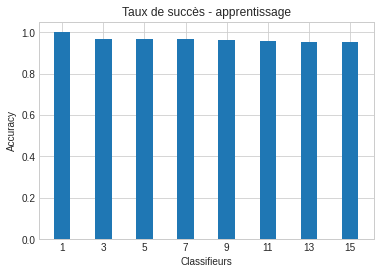

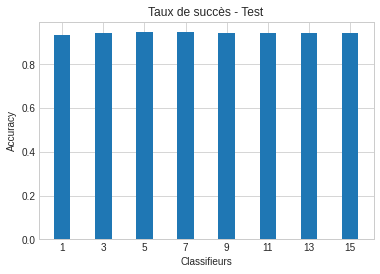

In [68]:
plt.title('Taux de succès - apprentissage')
plt.bar(K, train_info_df.loc['Acc'])
plt.xticks(K)
plt.xlabel('Classifieurs')
plt.ylabel('Accuracy')
plt.show()

plt.title('Taux de succès - Test')
plt.bar(K, test_info_df.loc['Acc'])
plt.xticks(K)
plt.xlabel('Classifieurs')
plt.ylabel('Accuracy')
plt.show()

Etudions la précision et le rappel des classifieurs sur la classe -1.

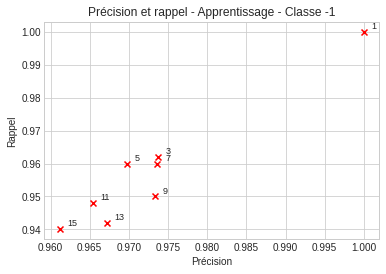

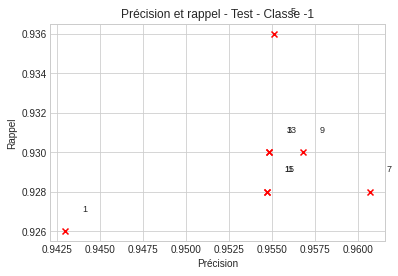

In [69]:
plt.title('Précision et rappel - Apprentissage - Classe -1')
x, y = train_info_df.loc['(-1) Précision'], train_info_df.loc['(-1) Rappel']
plt.scatter(x, y, marker='x', color='red')
for xi, yi, k in zip(x, y, K):
    plt.text(xi+.001, yi+.001, k, fontsize=9)
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.show()

plt.title('Précision et rappel - Test - Classe -1')
x, y = test_info_df.loc['(-1) Précision'], test_info_df.loc['(-1) Rappel']
plt.scatter(x, y, marker='x', color='red')
for xi, yi, k in zip(x, y, K):
    plt.text(xi+.001, yi+.001, k, fontsize=9)
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.show()

Etudions la précision et le rappel des classifieurs sur la classe +1.

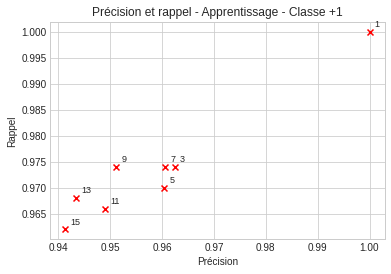

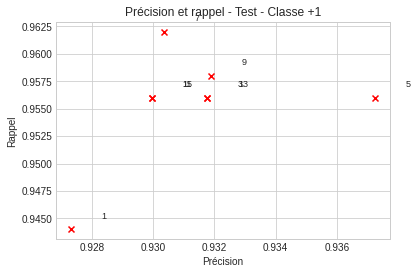

In [70]:
plt.title('Précision et rappel - Apprentissage - Classe +1')
x, y = train_info_df.loc['(+1) Précision'], train_info_df.loc['(+1) Rappel']
plt.scatter(x, y, marker='x', color='red')
for xi, yi, k in zip(x, y, K):
    plt.text(xi+.001, yi+.001, k, fontsize=9)
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.show()

plt.title('Précision et rappel - Test - Classe +1')
x, y = test_info_df.loc['(+1) Précision'], test_info_df.loc['(+1) Rappel']
plt.scatter(x, y, marker='x', color='red')
for xi, yi, k in zip(x, y, K):
    plt.text(xi+.001, yi+.001, k, fontsize=9)
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.show()

#### Validation croisée 

Etudions les performances, par validation croisée, du classifieur KNN.

In [71]:
knn = KNNClassifier(in_dim, 5)

Permutons aléatoirement les données.

In [72]:
permut = np.random.permutation(len(Y_train))
X_train_permut = X_train[permut]
Y_train_permut = Y_train[permut]

Faisons 10 itérations d'évaluation et sauvegardons les performances en apprentissage et en test.

In [73]:
n = 10
train_info = {}
test_info = {}

# for i in range(n):

In [74]:
# i = 0
i = 0
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [75]:
# i = 1
i = 1
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [76]:
# i = 2
i = 2
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [77]:
# i = 3
i = 3
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [78]:
# i = 4
i = 4
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [79]:
# i = 5
i = 5
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [80]:
# i = 6
i = 6
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [81]:
# i = 7
i = 7
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [82]:
# i = 8
i = 8
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [83]:
# i = 9
i = 9
X, Y, X_t, Y_t = crossvalmulti(X_train_permut, Y_train_permut, n, i)
trained = copy.deepcopy(knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

Affichons les performances pour les données d'apprentissage.

In [84]:
train_info_df = pd.DataFrame.from_dict(train_info)
train_info_df

,i = 0,i = 1,i = 2,i = 3,i = 4,i = 5,i = 6,i = 7,i = 8,i = 9
Acc,0.962222,0.958889,0.966667,0.970000,0.963333,0.965556,0.971111,0.972222,0.967778,0.962222
Err,0.037778,0.041111,0.033333,0.030000,0.036667,0.034444,0.028889,0.027778,0.032222,0.037778
(-1) Précision,0.968468,0.961969,0.970852,0.977427,0.968539,0.966592,0.977477,0.975391,0.975169,0.966368
(-1) Rappel,0.955556,0.955556,0.962222,0.962222,0.957778,0.964444,0.964444,0.968889,0.960000,0.957778
(+1) Précision,0.956140,0.955850,0.962555,0.962801,0.958242,0.964523,0.964912,0.969095,0.960613,0.958150
(+1) Rappel,0.968889,0.962222,0.971111,0.977778,0.968889,0.966667,0.977778,0.975556,0.975556,0.966667


In [85]:
test_info_df = pd.DataFrame.from_dict(test_info)
test_info_df

,i = 0,i = 1,i = 2,i = 3,i = 4,i = 5,i = 6,i = 7,i = 8,i = 9
Acc,0.96,0.990000,0.960000,0.920000,0.96,0.950000,0.94,0.930000,0.960000,0.96
Err,0.04,0.010000,0.040000,0.080000,0.04,0.050000,0.06,0.070000,0.040000,0.04
(-1) Précision,0.96,0.980392,1.000000,0.888889,0.96,0.978723,0.94,0.977778,1.000000,0.96
(-1) Rappel,0.96,1.000000,0.920000,0.960000,0.96,0.920000,0.94,0.880000,0.920000,0.96
(+1) Précision,0.96,1.000000,0.925926,0.956522,0.96,0.924528,0.94,0.890909,0.925926,0.96
(+1) Rappel,0.96,0.980000,1.000000,0.880000,0.96,0.980000,0.94,0.980000,1.000000,0.96


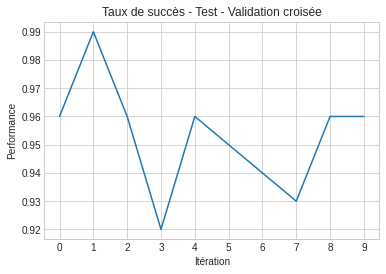

In [86]:
plt.title('Taux de succès - Test - Validation croisée')
plt.plot(range(10), test_info_df.loc['Acc'])
plt.xticks(range(10))
plt.xlabel('Itération')
plt.ylabel('Performance')
plt.show()

### Perceptron

#### Percepton sans transformation des données

In [87]:
perceptronId = PerceptronClassifier(in_dim, 0.001, KernelId(in_dim), 0)

In [88]:
perceptronId.train(X_train, Y_train)
print(f'Temps de convergence : {perceptronId.get_conv_time():.4f} s')

Temps de convergence : 0.5234 s


In [89]:
stats(perceptronId, X_train, Y_train, X_test, Y_test)

,Train,Test
Acc,1.0,0.864000
Err,0.0,0.136000
(-1) Précision,1.0,0.848659
(-1) Rappel,1.0,0.886000
(+1) Précision,1.0,0.880753
(+1) Rappel,1.0,0.842000


#### Comparaison en fonction du learning rate

In [90]:
lrs = np.arange(0.01, 0.001, -0.001)
conv_time_info = []
train_info = {}
test_info = {}

#for lr in lrs:

In [91]:
# 0.010
lr = 0.01    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

In [92]:
# 0.009
lr = 0.009    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

In [93]:
# 0.008
lr = 0.008    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

In [94]:
# 0.007
lr = 0.007    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

In [95]:
# 0.006
lr = 0.006    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

In [96]:
# 0.005
lr = 0.005    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

In [97]:
# 0.004
lr = 0.004    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

In [98]:
# 0.003
lr = 0.003    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

In [99]:
# 0.002
lr = 0.002    
perceptron = PerceptronClassifier(in_dim, lr, KernelId(in_dim), 0)
perceptron.train(X_train, Y_train)
conv_time_info.append(perceptron.get_conv_time())
train_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_train, Y_train)
test_info[f'lr = {lr:.3f}'] = perceptron.evaluate(X_test, Y_test)

Affichons les temps de convergence:

In [100]:
print(conv_time_info)
print(f'Temps moyen : {np.mean(conv_time_info):.4f} s')

[0.6476106643676758, 0.8693108558654785, 0.9290585517883301, 0.736518144607544, 0.8215508460998535, 0.8227415084838867, 1.164027452468872, 0.9344446659088135, 0.8095414638519287]
Temps moyen : 0.8594 s


Evaluation sur les données d'apprentissage :

In [101]:
train_info_df = pd.DataFrame.from_dict(train_info)
train_info_df

,lr = 0.010,lr = 0.009,lr = 0.008,lr = 0.007,lr = 0.006,lr = 0.005,lr = 0.004,lr = 0.003,lr = 0.002
Acc,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Err,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(-1) Précision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
(-1) Rappel,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
(+1) Précision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
(+1) Rappel,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Evaluation sur les données de test :

In [102]:
test_info_df = pd.DataFrame.from_dict(test_info)
test_info_df

,lr = 0.010,lr = 0.009,lr = 0.008,lr = 0.007,lr = 0.006,lr = 0.005,lr = 0.004,lr = 0.003,lr = 0.002
Acc,0.871000,0.872000,0.868000,0.865000,0.864000,0.863000,0.867000,0.877000,0.866000
Err,0.129000,0.128000,0.132000,0.135000,0.136000,0.137000,0.133000,0.123000,0.134000
(-1) Précision,0.846729,0.859073,0.855212,0.854369,0.855469,0.852427,0.866267,0.868885,0.854651
(-1) Rappel,0.906000,0.890000,0.886000,0.880000,0.876000,0.878000,0.868000,0.888000,0.882000
(+1) Précision,0.898925,0.885892,0.881743,0.876289,0.872951,0.874227,0.867735,0.885481,0.878099
(+1) Rappel,0.836000,0.854000,0.850000,0.850000,0.852000,0.848000,0.866000,0.866000,0.850000


#### Perceptrons et noyau polynomial

In [103]:
perceptron_kernel = PerceptronClassifier(in_dim, 0.001, KernelPoly(in_dim), 0)
perceptron_kernel.train(X_train, Y_train, niter_max=1000, seuil=1e-6)
print(f'Temps de convergence : {perceptron_kernel.get_conv_time():.4f} s')

Temps de convergence : 102.6929 s


In [104]:
print(f'Taux de bonne classification apprentissage :{perceptron_kernel.accuracy(X_train, Y_train)}')

Taux de bonne classification apprentissage :1.0


In [105]:
print(f'Taux de bonne classification test :{perceptron_kernel.accuracy(X_test, Y_test)}')

Taux de bonne classification test :0.949


In [106]:
stats(perceptron_kernel, X_train, Y_train, X_test, Y_test)

,Train,Test
Acc,1.0,0.949000
Err,0.0,0.051000
(-1) Précision,1.0,0.935922
(-1) Rappel,1.0,0.964000
(+1) Précision,1.0,0.962887
(+1) Rappel,1.0,0.934000


### Random Perceptron Kernel

In [107]:
rdm_perc = RandomPerceptronClassifier(in_dim, 0.001, 0, 21, 0.75, int(np.sqrt(in_dim)))
rdm_perc.train(X_train, Y_train)
print(f'Temps de convergence : {rdm_perc.get_conv_time():.4f} s')

Temps de convergence : 5.4235 s


In [108]:
stats(rdm_perc, X_train, Y_train, X_test, Y_test)

,Train,Test
Acc,0.963000,0.910000
Err,0.037000,0.090000
(-1) Précision,0.947776,0.885338
(-1) Rappel,0.980000,0.942000
(+1) Précision,0.979296,0.938034
(+1) Rappel,0.946000,0.878000


In [109]:
rdm_perc = RandomPerceptronClassifier(in_dim, 0.001, 0, 101, 0.75, int(np.sqrt(in_dim)))
rdm_perc.train(X_train, Y_train)
print(f'Temps de convergence : {rdm_perc.get_conv_time():.4f} s')

Temps de convergence : 28.4672 s


In [110]:
stats(rdm_perc, X_train, Y_train, X_test, Y_test)

,Train,Test
Acc,0.979000,0.937000
Err,0.021000,0.063000
(-1) Précision,0.974257,0.924272
(-1) Rappel,0.984000,0.952000
(+1) Précision,0.983838,0.950515
(+1) Rappel,0.974000,0.922000


### Prédictions 

Le perceptron avec noyau polynomial présente les meilleures performances en apprentissage et en test. Nous allons donc utiliser ce classifieur pour prédire les classes des exemples du fichier `eval.csv`. 

Dans un premier temps, nous allons sauvegarder les résultats dans le fichier `eval_perceptron_kernel.csv` dans le même dossier.

In [111]:
classifier = perceptron_kernel
Y_pred_eval = classifier.predict_all(X_eval)

In [112]:
eval_pred = np.zeros((eval_arr.shape[0], 2), dtype=int)
eval_pred[:, 0] = eval_arr[:, 0]
eval_pred[:, 1] = Y_pred_eval

In [113]:
pd.DataFrame(eval_pred).to_csv('Bases_IADS/eval_perceptron_kernel.csv', sep=';', header=None, index=None)

In [114]:
# Y_eval = ?
# np.sum(Y_pred_eval == Y_eval) / len(Y_eval)

## Classification multi-classes

In [115]:
in_dim = X_train_multi.shape[1]
in_dim


784

### KNN

#### KNN k = 1

In [116]:
multi_knn = KNNMultiClassifier(in_dim, 1)
multi_knn.train(X_train_multi, Y_train_multi)

In [117]:
stats_df = stats(multi_knn, X_train_multi, Y_train_multi, X_test_multi, Y_test_multi)
stats_df

,Train,Test
Acc,1.0,0.892500
Err,0.0,0.107500
(0) Précision,1.0,0.942029
(0) Rappel,1.0,0.489950
(1) Précision,1.0,0.843220
(1) Rappel,1.0,0.527851
(2) Précision,1.0,0.982558
(2) Rappel,1.0,0.443570
(3) Précision,1.0,0.862745
(3) Rappel,1.0,0.484848


Représentons la précision et le rappel pour chaque classe.

In [118]:
train_info_df = stats_df['Train']
test_info_df = stats_df['Test']

In [119]:
cls = list(range(10))

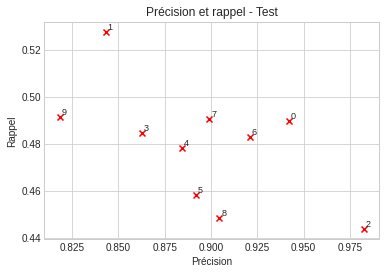

In [120]:
plt.title('Précision et rappel - Test')
x = [test_info_df.loc[f'({i}) Précision'] for i in cls]
y = [test_info_df.loc[f'({i}) Rappel'] for i in cls]
plt.scatter(x, y, marker='x', color='r')
for xi, yi, i in zip(x, y, cls):
    plt.text(xi+.001, yi+.001, i, fontsize=9)
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.show()

#### Comparaison des performances en fonction de k

In [121]:
K = np.arange(1, 16, 2)
train_info = {}
test_info = {}

#for k in K:  

In [122]:
# 1
k = 1
multi_knn = KNNMultiClassifier(in_dim, k)
multi_knn.train(X_train_multi, Y_train_multi)
train_info[f'k = {k}'] = multi_knn.evaluate(X_train_multi, Y_train_multi)
test_info[f'k = {k}'] = multi_knn.evaluate(X_test_multi, Y_test_multi)  

In [123]:
# 3
k = 3
multi_knn = KNNMultiClassifier(in_dim, k)
multi_knn.train(X_train_multi, Y_train_multi)
train_info[f'k = {k}'] = multi_knn.evaluate(X_train_multi, Y_train_multi)
test_info[f'k = {k}'] = multi_knn.evaluate(X_test_multi, Y_test_multi)  

In [124]:
# 5
k = 5
multi_knn = KNNMultiClassifier(in_dim, k)
multi_knn.train(X_train_multi, Y_train_multi)
train_info[f'k = {k}'] = multi_knn.evaluate(X_train_multi, Y_train_multi)
test_info[f'k = {k}'] = multi_knn.evaluate(X_test_multi, Y_test_multi)  

In [125]:
# 7
k = 7
multi_knn = KNNMultiClassifier(in_dim, k)
multi_knn.train(X_train_multi, Y_train_multi)
train_info[f'k = {k}'] = multi_knn.evaluate(X_train_multi, Y_train_multi)
test_info[f'k = {k}'] = multi_knn.evaluate(X_test_multi, Y_test_multi)  

In [126]:
# 9
k = 9
multi_knn = KNNMultiClassifier(in_dim, k)
multi_knn.train(X_train_multi, Y_train_multi)
train_info[f'k = {k}'] = multi_knn.evaluate(X_train_multi, Y_train_multi)
test_info[f'k = {k}'] = multi_knn.evaluate(X_test_multi, Y_test_multi)  

In [127]:
# 11
k = 11
multi_knn = KNNMultiClassifier(in_dim, k)
multi_knn.train(X_train_multi, Y_train_multi)
train_info[f'k = {k}'] = multi_knn.evaluate(X_train_multi, Y_train_multi)
test_info[f'k = {k}'] = multi_knn.evaluate(X_test_multi, Y_test_multi)  

In [128]:
# 13
k = 13
multi_knn = KNNMultiClassifier(in_dim, k)
multi_knn.train(X_train_multi, Y_train_multi)
train_info[f'k = {k}'] = multi_knn.evaluate(X_train_multi, Y_train_multi)
test_info[f'k = {k}'] = multi_knn.evaluate(X_test_multi, Y_test_multi)  

In [129]:
# 15
k = 15
multi_knn = KNNMultiClassifier(in_dim, k)
multi_knn.train(X_train_multi, Y_train_multi)
train_info[f'k = {k}'] = multi_knn.evaluate(X_train_multi, Y_train_multi)
test_info[f'k = {k}'] = multi_knn.evaluate(X_test_multi, Y_test_multi)  

In [130]:
train_info_df = pd.DataFrame.from_dict(train_info)
train_info_df

,k = 1,k = 3,k = 5,k = 7,k = 9,k = 11,k = 13,k = 15
Acc,1.0,0.947500,0.936000,0.927500,0.920000,0.907500,0.906500,0.899500
Err,0.0,0.052500,0.064000,0.072500,0.080000,0.092500,0.093500,0.100500
(0) Précision,1.0,0.947619,0.947619,0.952153,0.933962,0.929245,0.938095,0.938389
(0) Rappel,1.0,0.679181,0.629747,0.595808,0.575581,0.536785,0.530997,0.512953
(1) Précision,1.0,0.884956,0.836820,0.815574,0.802419,0.792000,0.777344,0.768340
(1) Rappel,1.0,0.716846,0.692042,0.665552,0.641935,0.598187,0.604863,0.585294
(2) Précision,1.0,0.973262,0.967568,0.967213,0.972067,0.971429,0.965318,0.970414
(2) Rappel,1.0,0.645390,0.594684,0.560127,0.528875,0.485714,0.479885,0.455556
(3) Précision,1.0,0.941176,0.930693,0.920792,0.924623,0.910448,0.913706,0.912371
(3) Rappel,1.0,0.673684,0.622517,0.590476,0.559271,0.522857,0.514286,0.490305


In [131]:
test_info_df = pd.DataFrame.from_dict(test_info)
test_info_df

,k = 1,k = 3,k = 5,k = 7,k = 9,k = 11,k = 13,k = 15
Acc,0.892500,0.895500,0.902500,0.899000,0.892500,0.888500,0.887000,0.882500
Err,0.107500,0.104500,0.097500,0.101000,0.107500,0.111500,0.113000,0.117500
(0) Précision,0.942029,0.919431,0.937799,0.937500,0.941748,0.923077,0.936893,0.923445
(0) Rappel,0.489950,0.502591,0.518519,0.507812,0.488665,0.481203,0.475369,0.468447
(1) Précision,0.843220,0.784314,0.772201,0.759542,0.739777,0.722022,0.706714,0.692042
(1) Rappel,0.527851,0.564972,0.595238,0.588757,0.578488,0.578035,0.583090,0.578035
(2) Précision,0.982558,0.965909,0.982249,0.981707,0.981818,0.987578,0.993750,0.993631
(2) Rappel,0.443570,0.455764,0.463687,0.447222,0.433155,0.418421,0.414062,0.400000
(3) Précision,0.862745,0.856459,0.896040,0.879808,0.891626,0.884615,0.880383,0.872038
(3) Rappel,0.484848,0.500000,0.509859,0.508333,0.483957,0.480418,0.477922,0.469388


#### Validation croisée

In [132]:
multi_knn = KNNMultiClassifier(in_dim, 5)

In [133]:
permut = np.random.permutation(len(Y_train_multi))
X_train_multi_permut = X_train_multi[permut]
Y_train_multi_permut = Y_train_multi[permut]

In [134]:
n = 10
train_info = {}
test_info = {}

#for i in range(n):

In [135]:
# i = 0
i = 0
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [136]:
# i = 1
i = 1
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [137]:
# i = 2
i = 2
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [138]:
# i = 3
i = 3
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [139]:
# i = 4
i = 4
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [140]:
# i = 5
i = 5
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [141]:
# i = 6
i = 6
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [142]:
# i = 7
i = 7
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [143]:
# i = 8
i = 8
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [144]:
# i = 9
i = 9
X, Y, X_t, Y_t = crossvalmulti(X_train_multi_permut, Y_train_multi_permut, n, i)
trained = copy.deepcopy(multi_knn)
trained.train(X, Y)
train_info[f'i = {i}'] = trained.evaluate(X, Y)
test_info[f'i = {i}'] = trained.evaluate(X_t, Y_t)

In [145]:
train_info_df = pd.DataFrame.from_dict(train_info)
train_info_df

,i = 0,i = 1,i = 2,i = 3,i = 4,i = 5,i = 6,i = 7,i = 8,i = 9
Acc,0.932778,0.932778,0.933333,0.931667,0.935000,0.936667,0.932778,0.938333,0.937222,0.930000
Err,0.067222,0.067222,0.066667,0.068333,0.065000,0.063333,0.067222,0.061667,0.062778,0.070000
(0) Précision,0.947090,0.952128,0.947090,0.942105,0.952128,0.957219,0.947090,0.947368,0.947090,0.946809
(0) Rappel,0.617241,0.615120,0.619377,0.615120,0.623693,0.628070,0.617241,0.640569,0.634752,0.605442
(1) Précision,0.814480,0.825688,0.841121,0.857143,0.833333,0.833333,0.833333,0.837209,0.833333,0.828704
(1) Rappel,0.692308,0.684411,0.676692,0.659341,0.689655,0.697674,0.679245,0.703125,0.700389,0.667910
(2) Précision,0.969136,0.970238,0.958333,0.975309,0.970060,0.975460,0.964072,0.970414,0.964072,0.958084
(2) Rappel,0.575092,0.584229,0.587591,0.570397,0.591241,0.591078,0.583333,0.607407,0.600746,0.573477
(3) Précision,0.934426,0.932961,0.933702,0.927778,0.923497,0.913043,0.928177,0.939227,0.933702,0.928571
(3) Rappel,0.610714,0.605072,0.610108,0.602888,0.621324,0.631579,0.608696,0.629630,0.625926,0.599291


In [146]:
test_info_df = pd.DataFrame.from_dict(test_info)
test_info_df

,i = 0,i = 1,i = 2,i = 3,i = 4,i = 5,i = 6,i = 7,i = 8,i = 9
Acc,0.910000,0.905000,0.905000,0.905000,0.885000,0.890000,0.915000,0.890000,0.890000,0.920000
Err,0.090000,0.095000,0.095000,0.095000,0.115000,0.110000,0.085000,0.110000,0.110000,0.080000
(0) Précision,0.952381,0.909091,0.952381,0.909091,0.869565,1.000000,1.000000,0.904762,0.952381,0.950000
(0) Rappel,0.540541,0.540541,0.526316,0.540541,0.500000,0.476190,0.540541,0.487179,0.487805,0.558824
(1) Précision,0.869565,0.833333,0.800000,0.769231,0.740741,0.769231,0.760000,0.800000,0.800000,0.800000
(1) Rappel,0.571429,0.571429,0.588235,0.606061,0.555556,0.555556,0.633333,0.540541,0.540541,0.645161
(2) Précision,0.950000,1.000000,1.000000,0.952381,0.947368,1.000000,0.904762,0.928571,1.000000,0.950000
(2) Rappel,0.527778,0.457143,0.457143,0.526316,0.450000,0.435897,0.558824,0.382353,0.421053,0.558824
(3) Précision,0.818182,0.909091,0.739130,0.869565,0.900000,0.950000,0.947368,0.941176,0.850000,0.857143
(3) Rappel,0.562500,0.540541,0.566667,0.555556,0.461538,0.475000,0.529412,0.432432,0.472222,0.580645


### Perceptron

#### Perceptron sans tranformation des données

In [147]:
perceptronId = PerceptronClassifier(in_dim, 0.001, KernelId(in_dim), 0)
multi_perceptronId = MultiClassifier(perceptronId)

In [148]:
multi_perceptronId.train(X_train_multi, Y_train_multi)
print(f'Temps de convergence : {multi_perceptronId.get_conv_time():.4f} s')

Temps de convergence : 16.3670 s


In [149]:
stats(multi_perceptronId, X_train_multi, Y_train_multi, X_test_multi, Y_test_multi)

,Train,Test
Acc,0.991000,0.826500
Err,0.009000,0.173500
(0) Précision,1.000000,0.908213
(0) Rappel,0.917431,0.364341
(1) Précision,1.000000,0.884259
(1) Rappel,0.917051,0.372320
(2) Précision,1.000000,0.902703
(2) Rappel,0.917431,0.336694
(3) Précision,0.995025,0.845411
(3) Rappel,0.921659,0.357143


#### Perceptron et noyau polynomial

In [ ]:
perceptron_kernel2 = PerceptronClassifier(in_dim, 0.001, KernelPoly(in_dim), 0)
multi_perceptron_kernel = MultiClassifier(perceptron_kernel2)
multi_perceptron_kernel.train(X_train_multi, Y_train_multi)
print(f'Temps de convergence : {multi_perceptron_kernel.get_conv_time():.4f} s')

In [ ]:
stats(multi_perceptron_kernel, X_train_multi, Y_train_multi, X_test_multi, Y_test_multi)

### Prédictions

Le perceptron avec noyau polynomial présente les meilleures performances en apprentissage et en test. Nous allons donc utiliser ce classifieur pour prédire les classes des exemples du fichier `eval_multi.csv`. 

Dans un premier temps, nous allons sauvegarder les résultats dans le fichier `eval_multi_perceptron_kernel.csv` dans le même dossier.

In [ ]:
classifier = multi_perceptron_kernel
Y_pred_eval_multi = classifier.predict_all(X_eval_multi)

In [ ]:
eval_pred_multi = np.zeros((eval_multi_arr.shape[0], 2), dtype=int)
eval_pred_multi[:, 0] = eval_multi_arr[:, 0]
eval_pred_multi[:, 1] = Y_pred_eval_multi

In [ ]:
pd.DataFrame(eval_pred_multi).to_csv('Bases_IADS_multiclasses/eval_multi_perceptron_kernel.csv', 
                                     sep=';', header=None, index=None)